## Multilayer Perceptron

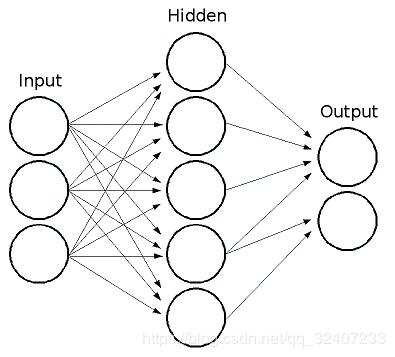

A multilayer perceptron (MLP) is a deep, artificial neural network. They are composed of an input layer to receive the signal, an output layer that makes a decision or prediction about the input, and in between those two, an arbitrary number of hidden layers that are the true computational engine of the MLP.

### **Vehicle dataset from cardekho**

This dataset contains information about used cars listed on www.cardekho.com
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

    name
    year
    selling_price
    km_driven
    fuel
    seller_type
    transmission
    Owner

To read more about data visit https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

### Predicting selling prices of used cars using MLP.

In [36]:
# Importing necessary libraries
import numpy as np                  # Library to use and manipulate arrays
import pandas as pd                 # Data manipulation library 
import matplotlib.pyplot as plt     # Plotting library

from sklearn.model_selection import train_test_split            # To split data into train and test
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Scaling data
from sklearn.metrics import mean_squared_error, r2_score        # Metrics for gauging performance

import tensorflow as tf                                    # Machine learning library 
from tensorflow import keras                               # High level API with tensorflow as backend 
from tensorflow.keras import layers, models, optimizers    # Components to build a neural network
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# We set a random seed to ensure results are reproducible
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [37]:
# Reading data 
# Pandas provides read_csv command to read files with .csv extension
data = pd.read_csv("Car details v3.xls")
data.head(3)    #Looking at first 3 data points

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [38]:
#Preprocessing input data

#Dropping rows with missing values
preprocessed_data = data.dropna()

#Dropping cols 
preprocessed_data = preprocessed_data.drop(['name', 'torque'], axis=1)

#Removing units and making datafields (like 1248CC ---> 1248) processable
for col in ["mileage", "engine", "max_power"]:
    preprocessed_data[col] = list(map(lambda x: eval(x.split()[0]), preprocessed_data[col]))

#One hot encoding categorical columns as they cannot be directly fed to a network
cat_cols = ["fuel", "seller_type", "transmission", "owner"]
cat_data = pd.get_dummies(preprocessed_data[cat_cols])

#Merging numerical and categorical data to get final preprocessed dataframe
num_data = preprocessed_data.drop(cat_cols, axis=1)
preprocessed_data = num_data.join(cat_data)

X, y = preprocessed_data.drop("selling_price", axis=1), preprocessed_data.selling_price

In [39]:
# Splitting data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=.8)

# Scaling data using MinMaxScaler
# Here we scale data in range 0 to 1
input_scaler = MinMaxScaler()                           # Scaler to scale input
X_train_scaled = input_scaler.fit_transform(X_train)    # Fitting scaler and transforming train data
X_val_scaled = input_scaler.transform(X_val)            # Transforming validation data

output_scaler = MinMaxScaler()                                                  # Scaler to scale output
y_train_scaled = output_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = output_scaler.transform(y_val.values.reshape(-1, 1))

In [40]:
# Number of neurons in each layer
n=3

# Building Sequential Model
MLP = models.Sequential(name="MLP")

# 3 Hidden Layers with 'relu' activation and 'n' neurons in each layer
MLP.add(layers.Dense(n, activation='relu', input_shape=(X_train_scaled.shape[1],)))
MLP.add(layers.Dense(n, activation='relu'))
MLP.add(layers.Dense(n, activation='relu'))
# Output Layer with 1 neuron because expected output is a single number and linear activation
MLP.add(layers.Dense(1, activation='linear'))

#Model Summary
MLP.summary()

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 3)                 63        
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 4         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compiling model build comutational graph and initializes weights
# .compile takes various arguments, we'll be using
#    loss --> loss function to be used, it depends on task 
#    optimizer --> optimizer to update weights, different optimizers work well for different problems
#                    possible choices are 'adam', 'sgd', 'rmsprop'[default], 'adagrad', etc

# use 'mse' as loss function and 'adam' as optimizer
MLP.compile(loss='mse', optimizer=optimizers.Adam(learning_rate=1e-3))

# .fit trains model by updating weights to reduce loss
# epochs --> Number of times to go through complete data
# validation data --> This data is to assess performance of your model and ensure 
#                     model isn't overfitting
# verbose --> whether to print training progress
history = MLP.fit(X_train_scaled, y_train_scaled, epochs=20,
            validation_data=(X_val_scaled, y_val_scaled),
            verbose=1)

Epoch 1/20
198/198 [==============================] - 1s 2ms/step - loss: 0.0138 - val_loss: 0.0038
Epoch 2/20
198/198 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 3/20
198/198 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 4/20
198/198 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 5/20
198/198 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 6/20
198/198 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 7/20
198/198 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 8/20
198/198 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 9/20
198/198 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 10/20
198/198 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0012

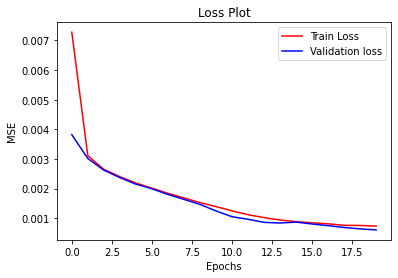

In [42]:
# Plotting loss plot 
# Loss plot has train loss and validation loss as a function of epochs
# Various insights can be drawn about model by looking at loss plot

plt.plot(history.history['loss'], label="Train Loss", color='red')          # plot train loss
plt.plot(history.history["val_loss"], label="Validation loss", color='blue')# plot val loss

plt.xlabel("Epochs")        # X label
plt.ylabel("MSE")           # Y label
plt.title("Loss Plot")      # Plot title

plt.legend()                # Plot legend 

In [43]:
# MSE is not a very good metric as a low mse for one problem can be high for other
# Hence we will use r2 score, if it is closer to 1 the model is good
# Read more about why R2 score over  MSE here https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/

# We will use sklearn's implementation of r2 score
# It takes two arguments 'y_true' and 'y_pred'
train_r2 = r2_score(y_train_scaled, MLP.predict(X_train_scaled))
val_r2 = r2_score(y_val_scaled, MLP.predict(X_val_scaled))

# Printing r2 scores
print("R2 Score")
print(f"  Train R2: {train_r2:.2f}")
print(f"  Val   R2: {val_r2:.2f}")

R2 Score
  Train R2: 0.89
  Val   R2: 0.91


In [44]:
# Saving model so the next time we don't have to train from scratch, we can simply load model
MLP.save("MLP_v1")

INFO:tensorflow:Assets written to: MLP_v1/assets


In [45]:
#Predict selling price of a used car

#You may change values and see difference in output
#This can also be used to analyze factors affecting selling price of a used car

year = 2002         #Year bought 
km_driven = 10000   #Km driven
mileage = 22        #Mileage (in kmpl)
engine = 900        #Engine capacity (in CC) 
max_power = 90      #Max Power (in bhp) 
seats = 5           #Number of Seats

fuel = 'Petrol'             #["CNG", "Diesel", "LPG", "Petrol"]
seller_type = 'Individual'  #["Dealer", "Individual", "Trustmark Dealer"]
transmission = 'Manual'     #["Auto", "Manual"]
ownership = 'Second owner'  #['First owner','Fourth and above owner','Second owner','Test Drive car','Third owner']

#Deling with categorical data
def one_hot(encoding_scheme, item):
    """
    returns one hot encoded list a/c to given scheme
    ex.
    one_hot(['A', 'B', 'C'], 'C') returns [0,0,1]
    """
    assert item in encoding_scheme, f"{item} not in {encoding_scheme}"
    res = [0]*len(encoding_scheme)
    res[encoding_scheme.index(item)] = 1
    return res


fuel_scheme = ["CNG", "Diesel", "LPG", "Petrol"]
seller_scheme = ["Dealer", "Individual", "Trustmark Dealer"]
transmission_scheme = ["Auto", "Manual"]
ownership_scheme = ['First owner', 'Fourth and above owner', 'Second owner' , 'Test Drive car','Third owner']

#Creating input which can be used by model
data_row = [year, km_driven, mileage, engine, max_power, seats]+ \
            one_hot(fuel_scheme, fuel)+\
            one_hot(seller_scheme, seller_type)+\
            one_hot(transmission_scheme, transmission)+\
            one_hot(ownership_scheme, ownership)


x = np.array(data_row).reshape(1,-1)    #List to array
x = input_scaler.transform(x)           #scaling input
y_pred = output_scaler.inverse_transform(MLP.predict(x))[0][0]    #inverse scaling output
print(f"Predicted Selling Price is Rs {y_pred:.0f}.")             #printing predicted price


Predicted Selling Price is Rs 163162.
